In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [8]:
df = pd.read_csv("student_depression_dataset.csv")

# Preview
print(df.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [10]:
# Check data types
print(df.dtypes)

# Columns like Sleep Duration, Dietary Habits, Degree, Gender, City, Profession, Suicidal thoughts, Family History are non-numeric


id                                         int64
Gender                                     int64
Age                                      float64
City                                       int64
Profession                                 int64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                     int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness           int64
Depression                                 int64
dtype: object


In [ ]:
stack_model.fit(X_train, y_train)


In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'Gender', 'City', 'Profession', 'Degree',
    'Sleep Duration', 'Dietary Habits',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
df['Depression'] = le.fit_transform(df['Depression'])  # Yes=1, No=0


In [15]:

import numpy as np

df.replace('?', np.nan, inplace=True)

# Check number of missing values per column
print(df.isna().sum())



id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [16]:
# Drop ID column
X = df.drop(columns=['id', 'Depression'])
y = df['Depression']

# Scale numeric features (all columns are now numeric)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Replace '?' with NaN

In [17]:
# Example: fill numeric columns
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert strings to numbers if needed
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = ['Gender', 'City', 'Profession', 'Degree', 
                    'Sleep Duration', 'Dietary Habits',
                    'Have you ever had suicidal thoughts ?', 
                    'Family History of Mental Illness']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\legen\AppData\Local\Temp\ipykernel_15176\3048453308.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\legen\AppData\Local\Temp\ipykernel_15176\3048453308.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode target
df['Depression'] = le.fit_transform(df['Depression'])


In [19]:
X = df.drop(columns=['id', 'Depression'])
y = df['Depression']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('logistic_regression', LogisticRegression(max_iter=500))
]

# Stacking classifier with logistic regression as final estimator
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)


In [22]:
stack_model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('logistic_regression',
                                LogisticRegression(max_iter=500))],
                   final_estimator=LogisticRegression())

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = stack_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Stacking Model Accuracy: 0.8384
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



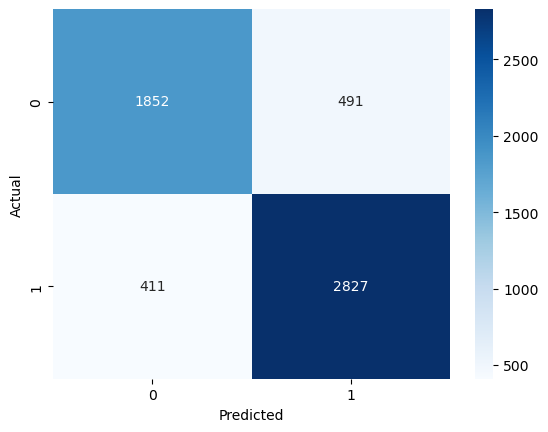

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


                                  Feature  Importance
12  Have you ever had suicidal thoughts ?    0.304238
4                       Academic Pressure    0.131833
6                                    CGPA    0.098770
2                                    City    0.074737
1                                     Age    0.071312
14                       Financial Stress    0.071217
11                                 Degree    0.057775
13                       Work/Study Hours    0.057175
7                      Study Satisfaction    0.040207
9                          Sleep Duration    0.033524
10                         Dietary Habits    0.027387
0                                  Gender    0.016213
15       Family History of Mental Illness    0.015098
3                              Profession    0.000323
8                        Job Satisfaction    0.000192
5                           Work Pressure    0.000000


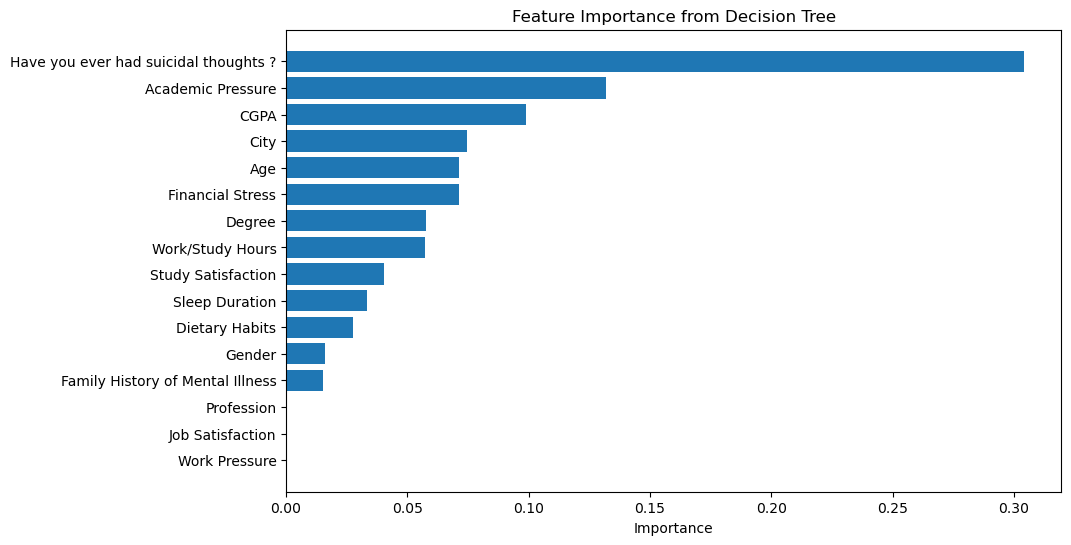

In [25]:
# Access the decision tree base model from stacking
dt_model = stack_model.named_estimators_['decision_tree']

# Get feature importances
importances = dt_model.feature_importances_
feature_names = X.columns

# Create a dataframe for easy visualization
import pandas as pd
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
print(feat_df)

# Optional: plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.show()


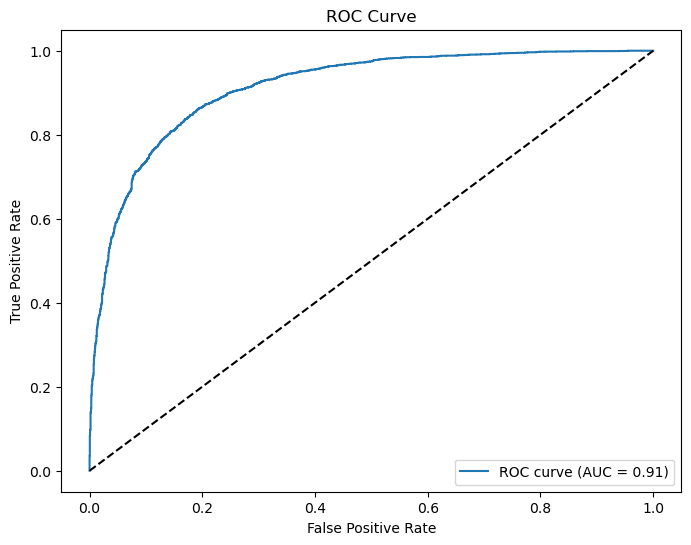

In [26]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_prob = stack_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
